<a href="https://colab.research.google.com/github/arshmehar/ssh_Indian_Ocean/blob/main/aviso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of Aviso: satellite-derived oceanographic data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install netCDF4

In [ ]:
import xarray as xr
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
aviso_ds = xr.open_dataset('/content/gdrive/MyDrive/prerna_data/AVISO/IO-AVISO_DSL_1993_2014-dsl.nc',engine="netcdf4")
print(aviso_ds)

<xarray.Dataset> Size: 182MB
Dimensions:            (LONGITUDE841_1200: 360, LATITUDE241_480: 240,
                        TIME: 264, bnds: 2)
Coordinates:
  * LONGITUDE841_1200  (LONGITUDE841_1200) float32 1kB 30.12 30.38 ... 119.9
  * LATITUDE241_480    (LATITUDE241_480) float32 960B -29.88 -29.62 ... 29.88
  * TIME               (TIME) datetime64[ns] 2kB 1993-01-16 ... 2014-12-16
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds          (TIME, bnds) datetime64[ns] 4kB ...
    AVISODSL           (TIME, LATITUDE241_480, LONGITUDE841_1200) float64 182MB ...
Attributes:
    history:      FERRET V7.3 (optimized)  5-Jul-24
    Conventions:  CF-1.6


/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


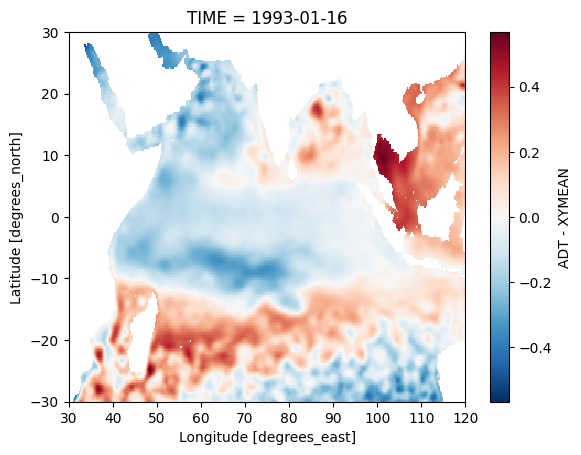

In [ ]:
data_var = aviso_ds['AVISODSL']
monthly = data_var.resample(TIME="M").mean()      #monthly means
data = data_var.isel(TIME=0)                      # Select first time step
data.plot()

In [ ]:
aviso_ds
aviso_ds.dims
aviso_ds.coords
aviso_ds.attrs

{'history': 'FERRET V7.3 (optimized)  5-Jul-24', 'Conventions': 'CF-1.6'}

In [ ]:
aviso_ds.AVISODSL

<xarray.DataArray 'AVISODSL' (TIME: 264, LATITUDE241_480: 240,
                              LONGITUDE841_1200: 360)> Size: 182MB
[22809600 values with dtype=float64]
Coordinates:
  * LONGITUDE841_1200  (LONGITUDE841_1200) float32 1kB 30.12 30.38 ... 119.9
  * LATITUDE241_480    (LATITUDE241_480) float32 960B -29.88 -29.62 ... 29.88
  * TIME               (TIME) datetime64[ns] 2kB 1993-01-16 ... 2014-12-16
Attributes:
    long_name:  ADT - XYMEAN
    history:    From Global-aviso-1993-2019

In [ ]:
data.isel(LONGITUDE841_1200=10)

<xarray.DataArray 'AVISODSL' (LATITUDE241_480: 240)> Size: 2kB
[240 values with dtype=float64]
Coordinates:
    LONGITUDE841_1200  float32 4B 32.62
  * LATITUDE241_480    (LATITUDE241_480) float32 960B -29.88 -29.62 ... 29.88
    TIME               datetime64[ns] 8B 1993-01-16
Attributes:
    long_name:  ADT - XYMEAN
    history:    From Global-aviso-1993-2019

In [ ]:
data.sel(LONGITUDE841_1200=32.62,method='nearest')

<xarray.DataArray 'AVISODSL' (LATITUDE241_480: 240)> Size: 2kB
[240 values with dtype=float64]
Coordinates:
    LONGITUDE841_1200  float32 4B 32.62
  * LATITUDE241_480    (LATITUDE241_480) float32 960B -29.88 -29.62 ... 29.88
    TIME               datetime64[ns] 8B 1993-01-16
Attributes:
    long_name:  ADT - XYMEAN
    history:    From Global-aviso-1993-2019

In [ ]:
data_min = data_var.min().item()
data_max = data_var.max().item()
print(f"Range of AVISODSL values: {data_min} to {data_max}")

Range of AVISODSL values: -0.8419583696973507 to 0.919739813898436


In [ ]:
#data.rolling(LATITUDE241_480=10, LONGITUDE841_1200=10, center=True).mean().plot()

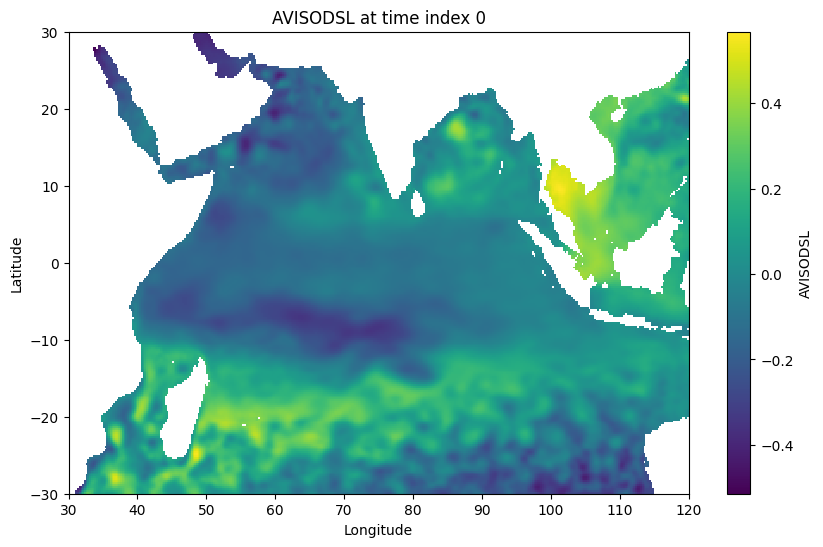

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.pcolormesh(aviso_ds['LONGITUDE841_1200'], aviso_ds['LATITUDE241_480'], data, shading='auto', cmap='viridis')
plt.colorbar(label='AVISODSL')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'AVISODSL at time index 0')
plt.show()


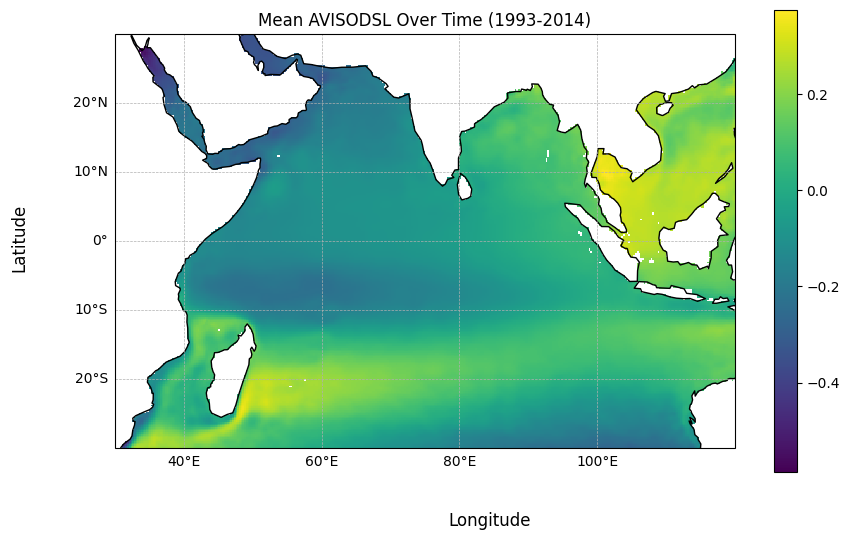

In [ ]:

# Compute the mean over TIME
mean_data = aviso_ds['AVISODSL'].mean(dim='TIME')

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot data
p = ax.pcolormesh(aviso_ds['LONGITUDE841_1200'], aviso_ds['LATITUDE241_480'], mean_data, shading='auto', cmap='viridis')

# Add colorbar
cbar = plt.colorbar(p, ax=ax)

# Set title
ax.set_title('Mean AVISODSL Over Time (1993-2014)')

# Add coastlines
ax.coastlines()

# Configure gridlines (Only left & bottom labels)
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5)
gl.top_labels = False    # Remove top labels
gl.right_labels = False  # Remove right labels

# **Manually Add Latitude & Longitude Labels**
fig.text(0.5, 0.02, 'Longitude', ha='center', fontsize=12)  # Bottom label
fig.text(0.02, 0.5, 'Latitude', va='center', rotation='vertical', fontsize=12)  # Left label

# Show plot
plt.show()



In [ ]:
=print(aviso_ds['TIME'].values[[0, -1]])


['1993-01-16T00:00:00.000000000' '2014-12-16T00:00:00.000000000']


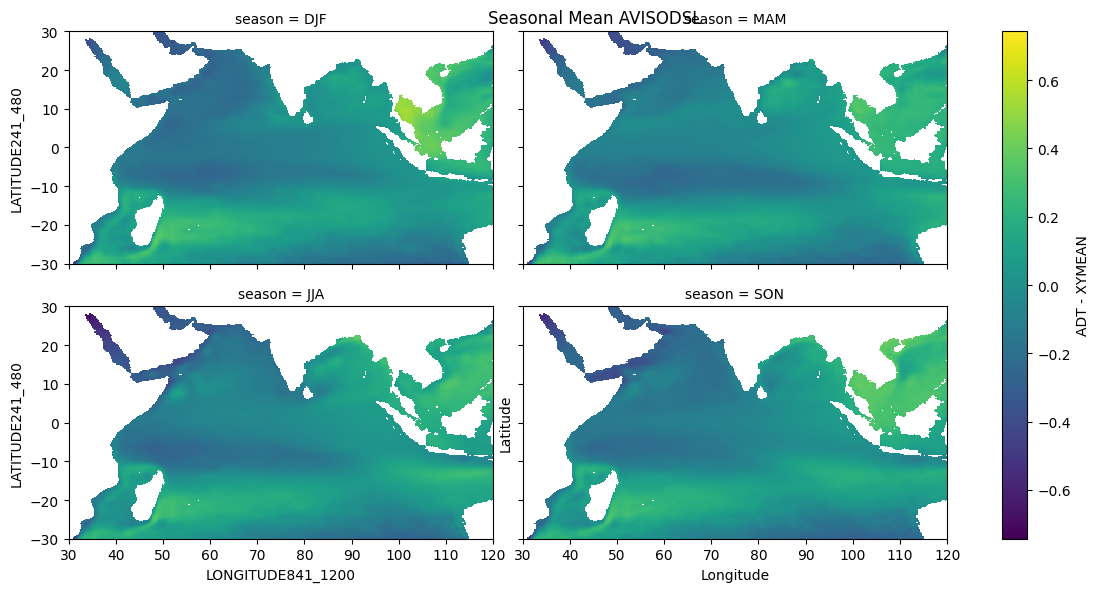

In [ ]:
data_var = aviso_ds['AVISODSL']

# seasonal mean
seasonal_mean = data_var.groupby('TIME.season').mean()

# Select the specific season
seasonal_mean = seasonal_mean.sel(season=["DJF", "MAM", "JJA", "SON"])

# Plot the seasonal mean for each season
seasonal_mean.plot(col="season", col_wrap=2, figsize=(12, 6), cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.suptitle('Seasonal Mean AVISODSL')
plt.show()

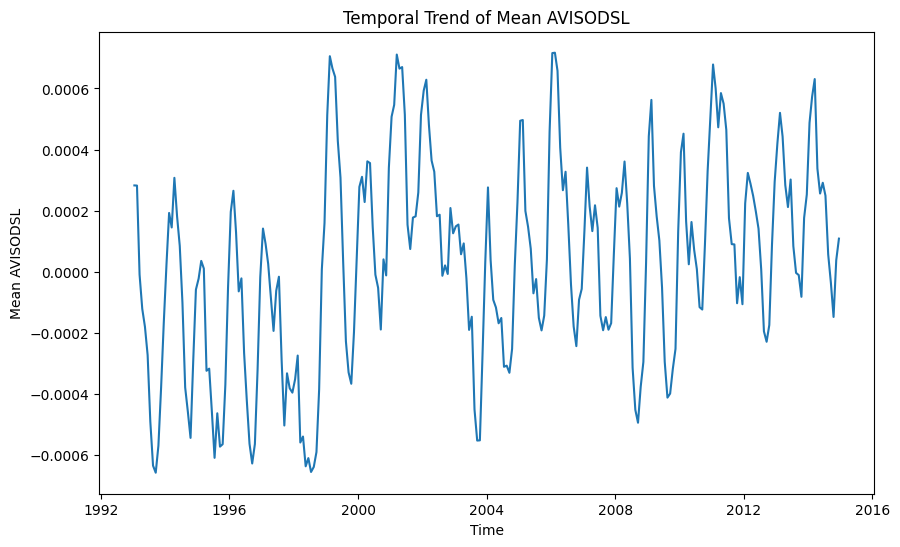

In [ ]:
data_var = aviso_ds['AVISODSL']

# Plot the time series of the mean AVISODSL
data_var.mean(dim=['LATITUDE241_480', 'LONGITUDE841_1200']).plot(figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('Mean AVISODSL')
plt.title('Temporal Trend of Mean AVISODSL')
plt.show()

/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:487: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


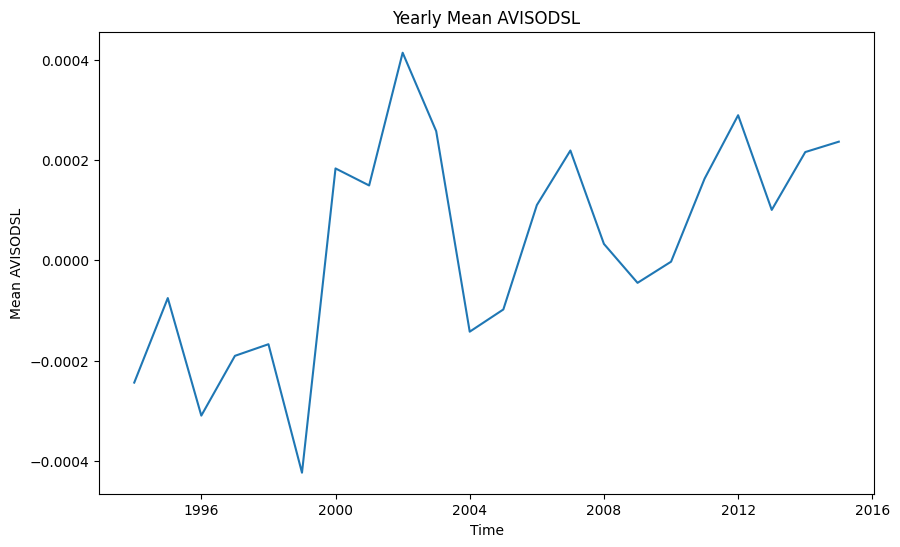

In [ ]:
data_var = aviso_ds['AVISODSL']

#  yearly mean by resampling
yearly_mean = data_var.resample(TIME='1Y').mean(dim='TIME')

# mean across latitude and longitude to get a time series
temporal_mean = yearly_mean.mean(dim=['LATITUDE241_480', 'LONGITUDE841_1200'])

# yearly mean AVISODSL
plt.figure(figsize=(10, 6))
temporal_mean.plot()
plt.xlabel('Time')
plt.ylabel('Mean AVISODSL')
plt.title('Yearly Mean AVISODSL')
plt.show()


In [ ]:
pip install hvplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 3.4 MB/s eta 0:00:00


In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 25.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import hvplot.xarray
import holoviews as hv
plot = data_var.hvplot(groupby="TIME", clim=(10, 110), widget_location='bottom')
plot

Column
    [0] HoloViews(DynamicMap, height=300, sizing_mode='fixed', widget_location='bottom', width=700)
    [1] WidgetBox(align=('center', 'end'))
        [0] DiscreteSlider(name='Time', options={'1993-01-16 00:00:00': nu...}, value=numpy.datetime64('1993-01-...)

In [ ]:
lat_min, lat_max = -60, 31.1859
lon_min, lon_max = 20.0026, 146.8982

# Slice the dataset
indian_ocean_ds = aviso_ds.sel(LATITUDE241_480=slice(lat_min, lat_max), LONGITUDE841_1200=slice(lon_min, lon_max))

# Access the data variable
data_var = indian_ocean_ds['AVISODSL']

# Inspect the range of the data
data_min = data_var.min().item()
data_max = data_var.max().item()
print(f"Data range: {data_min} to {data_max}")

# Plot using hvplot with adjusted color limits
plot = data_var.hvplot(groupby="TIME", clim=(data_min, data_max), widget_location='bottom')

plot

Data range: -0.8419583696973507 to 0.919739813898436


Column
    [0] HoloViews(DynamicMap, height=300, sizing_mode='fixed', widget_location='bottom', width=700)
    [1] WidgetBox(align=('center', 'end'))
        [0] DiscreteSlider(name='Time', options={'1993-01-16 00:00:00': nu...}, value=numpy.datetime64('1993-01-...)

In [ ]:
print(aviso_ds['LATITUDE241_480'])
print(aviso_ds['LONGITUDE841_1200'])

<xarray.DataArray 'LATITUDE241_480' (LATITUDE241_480: 240)> Size: 960B
array([-29.875, -29.625, -29.375, ...,  29.375,  29.625,  29.875],
      dtype=float32)
Coordinates:
  * LATITUDE241_480  (LATITUDE241_480) float32 960B -29.88 -29.62 ... 29.88
Attributes:
    long_name:      Latitude
    units:          degrees_north
    axis:           Y
    point_spacing:  even
    standard_name:  latitude
<xarray.DataArray 'LONGITUDE841_1200' (LONGITUDE841_1200: 360)> Size: 1kB
array([ 30.125,  30.375,  30.625, ..., 119.375, 119.625, 119.875],
      dtype=float32)
Coordinates:
  * LONGITUDE841_1200  (LONGITUDE841_1200) float32 1kB 30.12 30.38 ... 119.9
Attributes:
    long_name:      Longitude
    units:          degrees_east
    axis:           X
    modulo:         360.0
    point_spacing:  even
    standard_name:  longitude


In [ ]:
#grid resolution
lat_res = aviso_ds['LATITUDE241_480'].diff(dim='LATITUDE241_480').mean().item()
lon_res = aviso_ds['LONGITUDE841_1200'].diff(dim='LONGITUDE841_1200').mean().item()

print(f"Latitude resolution: {lat_res} degrees")
print(f"Longitude resolution: {lon_res} degrees")

Latitude resolution: 0.25 degrees
Longitude resolution: 0.25 degrees


In [ ]:
#irregularity
lat_diff = aviso_ds['LATITUDE241_480'].diff(dim='LATITUDE241_480').values
lon_diff = aviso_ds['LONGITUDE841_1200'].diff(dim='LONGITUDE841_1200').values

print("Latitude spacing differences:", lat_diff)
print("Longitude spacing differences:", lon_diff)

Latitude spacing differences: [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0